In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
def run_moran(N,n0,s,tmax):
  n = [n0]
  t = [0]
  while t[-1] < tmax:
    t_last,n_last = t[-1],n[-1]
    birth_rate = (1+s)*n_last*(1-n_last/N)
    death_rate = (N-n_last)*n_last/N
    rate_sum = birth_rate + death_rate
    dt = np.random.exponential(1/rate_sum)

    r = np.random.rand()
    if r < birth_rate/rate_sum:
      n_last = n_last +1
    else:
      n_last = n_last -1
    
    n.append(n_last)
    t.append(t_last + dt)

    if n_last ==0 or n_last ==N:
      break;
    
  return n,t

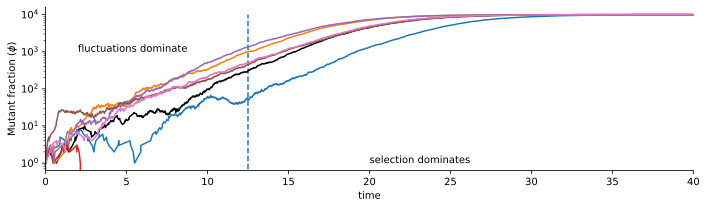

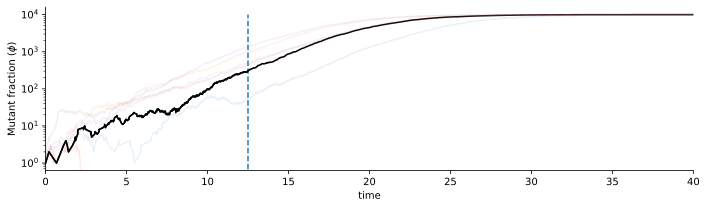

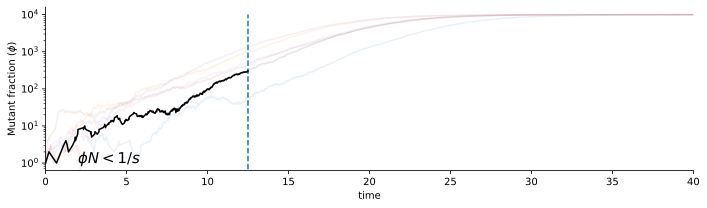

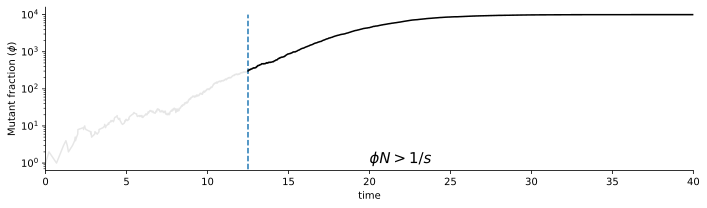

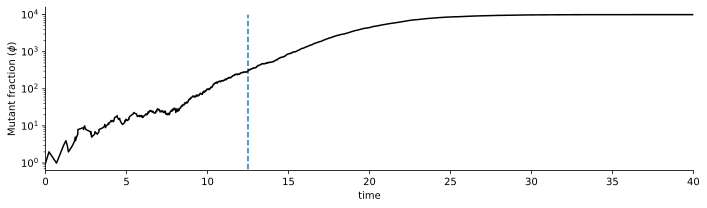

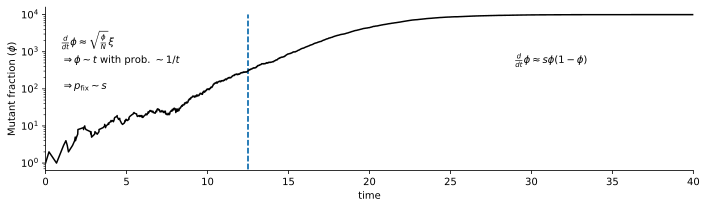

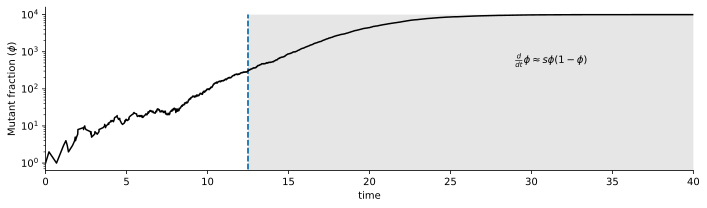

In [27]:
N = 10e3
s = 0.4
fixed = False
while not fixed:
  n,t = run_moran(N,1,s,1000)
  if n[-1] == N:
    fixed = True

fixed = False
while not fixed:
  n2,t2 = run_moran(N,1,s,1000)
  if n2[-1] == N:
    fixed = True


n3,t3 = run_moran(N,1,s,1000)

n4,t4 = run_moran(N,1,s,1000)

n5,t5 = run_moran(N,1,s,1000)

n6,t6 = run_moran(N,1,s,1000)

n7,t7 = run_moran(N,1,s,1000)

n8,t8= run_moran(N,1,s,1000)


# panel 1 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
#ax.fill_between([5/s,t[-1]],[0,0],[N,N],alpha=0.1,color="k",lw=0)
ax.semilogy(t,n,"k")
ax.semilogy(t2,n2)
ax.semilogy(t3,n3)
ax.semilogy(t4,n4)
ax.semilogy(t5,n5)
ax.semilogy(t6,n6)
ax.semilogy(t7,n7)
ax.semilogy(t8,n8)
ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.text(2, 10e2, 'fluctuations dominate',fontsize=10);
plt.text(20, 1, 'selection dominates',fontsize=10);
ax.set_xlim(0,40)
ax.vlines(5/s,0,N,linestyle="--")
plt.tight_layout()
plt.savefig("./../figures/moran_fix1.svg")


# panel 2 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
ax.semilogy(t,n,"k",alpha=1)
ax.semilogy(t2,n2,alpha=0.1)
ax.semilogy(t3,n3,alpha=0.1)
ax.semilogy(t4,n4,alpha=0.1)
ax.semilogy(t5,n5,alpha=0.1)
ax.semilogy(t6,n6,alpha=0.1)
ax.semilogy(t7,n7,alpha=0.1)
ax.semilogy(t8,n8,alpha=0.1)
ax.semilogy([t[k] for k in range(len(t)) if t[k]<5/s] ,[n[k] for k in range(len(t)) if t[k]<5/s],"k")
ax.vlines(5/s,0,N,linestyle="--")
ax.set_xlim(0,40)
ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.tight_layout()
plt.savefig("./../figures/moran_fix2.svg")

# panel 3 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
ax.semilogy(t,n,"k",alpha=0.1)
ax.semilogy(t2,n2,alpha=0.1)
ax.semilogy(t3,n3,alpha=0.1)
ax.semilogy(t4,n4,alpha=0.1)
ax.semilogy(t5,n5,alpha=0.1)
ax.semilogy(t6,n6,alpha=0.1)
ax.semilogy(t7,n7,alpha=0.1)
ax.semilogy(t8,n8,alpha=0.1)
ax.semilogy([t[k] for k in range(len(t)) if t[k]<5/s] ,[n[k] for k in range(len(t)) if t[k]<5/s],"k")

ax.vlines(5/s,0,N,linestyle="--")
plt.text(2, 1, r'$\phi N< 1/s$',fontsize=15);
ax.set_xlim(0,40)
ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.tight_layout()
plt.savefig("./../figures/moran_fix3.svg")

# panel 4 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
ax.semilogy(t,n,"k",alpha=0.1)

ax.semilogy([t[k] for k in range(len(t)) if t[k]>5/s] ,[n[k] for k in range(len(t)) if t[k]>5/s],"k")
ax.vlines(5/s,0,N,linestyle="--")
ax.set_xlim(0,40)
plt.text(20, 1, r'$\phi N> 1/s$',fontsize=15);



ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.tight_layout()
plt.savefig("./../figures/moran_fix4.svg")

# panel 5 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
ax.semilogy(t,n,"k",alpha=1)
ax.vlines(5/s,0,N,linestyle="--")
ax.set_xlim(0,40)


ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.tight_layout()
plt.savefig("./../figures/moran_fix5.svg")


# panel 3 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
ax.semilogy(t,n,"k")
ax.set_xlim(0,40)

ax.vlines(5/s,0,N,linestyle="--")
plt.text(1., 0.15*10e3, r'$\frac{d}{dt}\phi \approx \sqrt{\frac{\phi}{N}}\xi$',fontsize=10);
plt.text(1., 0.5*10e2, r'$\Rightarrow \phi \sim t$ with prob. $\sim 1/t$',fontsize=10);
plt.text(1., 0.1*10e2, r'$\Rightarrow p_{\rm fix} \sim s$',fontsize=10);
plt.text(29, 0.5*10e2, r'$\frac{d}{dt}\phi \approx s\phi(1-\phi)$',fontsize=10);
ax.vlines(5/s,0,N,linestyle="--")


ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.tight_layout()
plt.savefig("./../figures/moran_fix30.svg")


# panel 4 ---------------------------------------------------------------
fig,ax = plt.subplots(figsize=(10,3))
ax.semilogy(t,n,"k")
ax.set_xlim(0,40)

ax.fill_between([5/s,t[-1]],[0,0],[N,N],alpha=0.1,color="k",lw=0)
ax.vlines(5/s,0,N,linestyle="--")
plt.text(29, 0.5*10e2, r'$\frac{d}{dt}\phi \approx s\phi(1-\phi)$',fontsize=10);
ax.vlines(5/s,0,N,linestyle="--")


ax.set_xlabel("time")
ax.set_ylabel(r'Mutant fraction ($\phi$)')
plt.tight_layout()
plt.savefig("./../figures/moran_fix40.svg")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')